<a href="https://colab.research.google.com/github/janprince/ml_mobile_price_pred/blob/main/ml_mobile_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple, Samsung etc.

He does not know how to **estimate price of mobiles** his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to **find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price**. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

#### Features:
1. battery_power: 
Total energy a battery can store in one time measured in mAh

2. blue
3. clock_speed
4. dual_sim
5. fc
6. four_g
7. int_memory
8. m_dep
9. mobile_wt
10. n_cores
11. pc
12. px_height
13. px_width
14. ram
15. sc_h
16. sc_w
17. talk_time
18. three_g
19. touch_screen
20. wifi
21. price_range

## Loading Data

In [4]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/janprince/ml_mobile_price_pred/main/datasets/train.csv")

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# data quality report
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Exploratory data analysis

During data exploration we don’t need to go any further than simply recognizing that features seem to follow particular distributions, and this can be done from examining the histogram for each feature.

1. **TODO:** plot a histogram for each numerical attribute. 

A histogram shows the number of instances on the vertical axis) that have a given value range (on the horizontal axis).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e018d6ed0>,
      dtype=object)

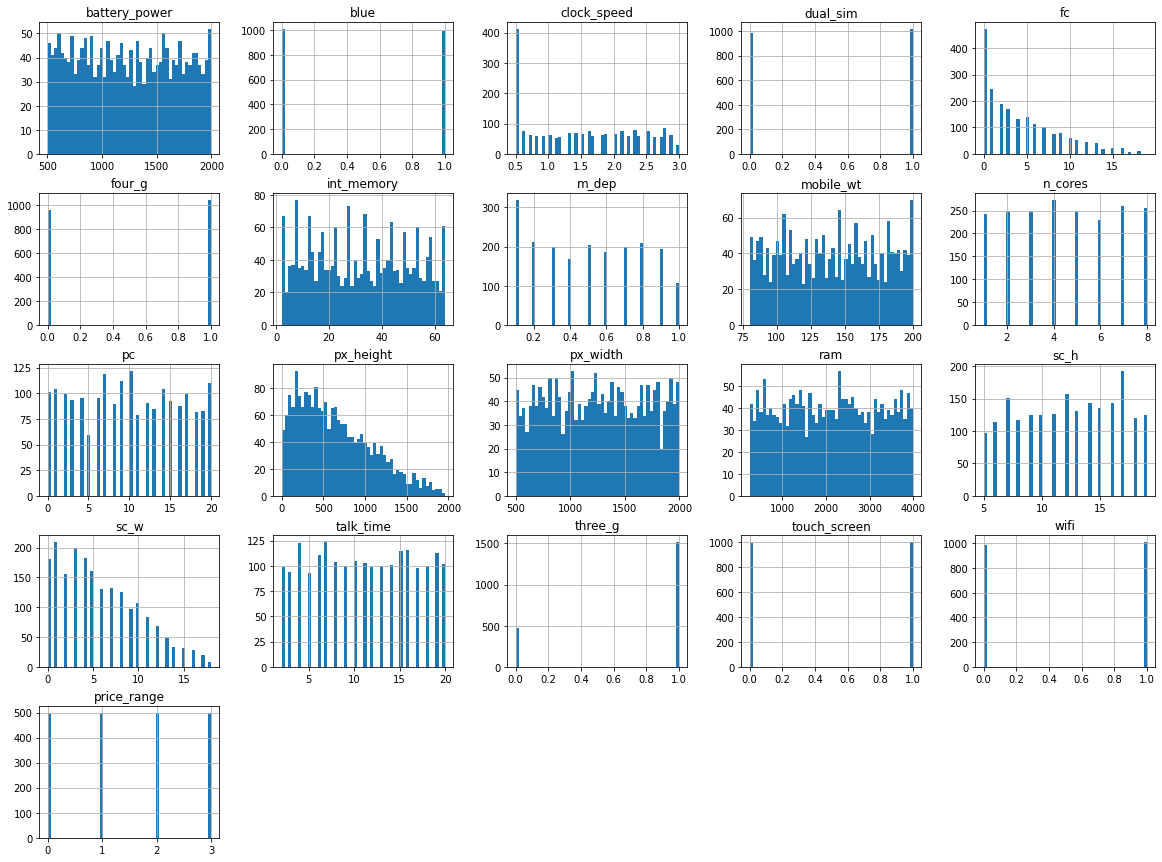

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))

The figures above show a selection of histogram shapes that exhibit characteristics commonly seen when analyzing features and that are indicative of standard, well-known probability distributions.


#### Example 
The **first figure** (battery_power) shows a histogram exhibiting a **uniform distribution**. A uniform distribution indicates that a feature is equally likely to take a value in any of the ranges present.

The **fifth figure** (fc) shows a histogram exhibiting a skewed distribution (skewed right). 

### Looking for Correlations

Let’s look at how much each attribute *correlates* with the **price range**

In [11]:
corr_matrix = data.corr()
corr_matrix["price_range"]

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

From the info above, **ram** has a strong positive correlation with **price range**. 


*NB: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation.* 

#### Plotting correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dfe12e750>,
      dtype=object)

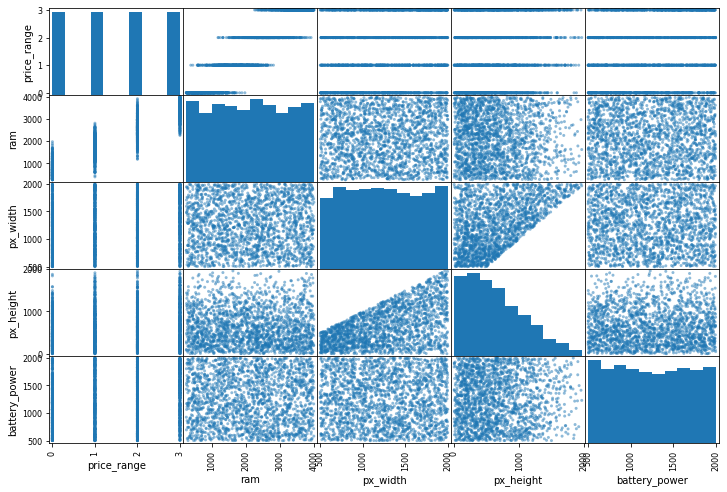

In [15]:
from pandas.plotting import scatter_matrix

select_features = ["price_range", "ram", "px_width", "px_height", "battery_power"]    # selected features
scatter_matrix(data[select_features], figsize=(12, 8))

The most promising feature to predict the price_range is the **ram**, so let’s zoom in on their correlation scatterplot.

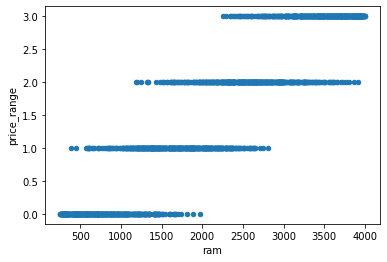

In [18]:
data.plot(kind="scatter", x="ram", y="price_range")

### Experimenting with Features (Transforming, Creating, Scaling, etc)

lets take a look at some new features (a derived one)

In [22]:
data["px_size"] = data["px_height"] * data["px_width"]    # pixel resolution
data["sc_size"] = data["sc_h"] * data["sc_w"]             # screen size in cm

# let's look at the correlation matrix again
corr_matrix = data.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_size          0.176240
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_size          0.041248
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Not bad! The **px_size** is more correlated with the **price_range** than the **px_height** or **px_width**. Same with **sc_size**.

In [23]:
data["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### Splitting data

In [28]:
from sklearn.model_selection import train_test_split

X = data.drop('price_range', axis=1)
y = data["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test.shape

(600, 22)

In [29]:
y_test.shape

(600,)

### Select a model and Train

#### Model 1

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()y
log_reg.fit(X_train, y_train)

# predict
log_reg.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5335714285714286

#### Model 2

In [48]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

# predict
sgd.score(X_train, y_train)

0.24714285714285714

In [50]:
# cross val
scores = cross_val_score(sgd, X_train, y_train, cv=5)
scores

array([0.24642857, 0.25357143, 0.27857143, 0.26071429, 0.25      ])

#### Model 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(random_state=42)
rand_clf.fit(X_train, y_train)

# score
rand_clf.score(X_train, y_train)

wow ! 1.0 score but wait, it is predicting on data it has seen already. Let's use cross-validation for a better evaluation

#### Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rand_clf, X_train, y_train, cv=5)
scores

array([0.87857143, 0.86785714, 0.86071429, 0.83928571, 0.85      ])

By using cross-validation, we are able to obtain scores of the model when it predicts on data it has not seen before.


**Model 2 seems to be underfitting therefore, we will go with model 3.**

### Fine-Tuning the Model